In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df = pd.read_csv(f'../Masonry2.csv', low_memory=False)
df

,Subject,Accelerometer.xlsx_z,Accelerometer.xlsx_y,Accelerometer.xlsx_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,...,qz,roll,qw,qy,pitch,position,seconds_elapsed,time,Real Time,Label_2
0,Masonry2,1.074343,1.493318,-0.746572,5.439828,-6.708486,-4.644869,0.427729,0.347874,0.986372,...,-0.376226,-2.434860,0.284781,-0.880887,0.753335,xd,14.896314,1.632820e+18,2021/09/28 16:14:33.375,4.0
1,Masonry2,2.075533,4.790214,-4.539466,-4.035935,-8.789878,1.618540,0.733454,-0.732922,0.126150,...,0.827225,0.381396,-0.146542,0.508143,1.111395,kd,14.903705,1.632820e+18,2021/09/28 16:14:33.375,4.0
2,Masonry2,0.456859,1.213607,0.408250,5.513233,-6.560159,-4.768540,0.813243,0.470735,0.702253,...,-0.366973,-2.428497,0.290231,-0.883068,0.732795,xd,14.916271,1.632820e+18,2021/09/28 16:14:33.395,4.0
3,Masonry2,5.064951,4.552775,-6.503851,-3.995491,-8.834654,1.468097,0.501055,-0.258037,0.417154,...,0.825624,0.352125,-0.148523,0.512678,1.121802,kd,14.923684,1.632820e+18,2021/09/28 16:14:33.395,4.0
4,Masonry2,-0.090145,0.895583,0.471845,5.539797,-6.417210,-4.929550,0.928298,0.555286,0.489576,...,-0.359224,-2.414418,0.297502,-0.883968,0.713354,xd,14.936229,1.632820e+18,2021/09/28 16:14:33.415,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 清除df空值行
df_cleaned = df.dropna()
df_cleaned


,Subject,Accelerometer.xlsx_z,Accelerometer.xlsx_y,Accelerometer.xlsx_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,...,qz,roll,qw,qy,pitch,position,seconds_elapsed,time,Real Time,Label_2
0,Masonry2,1.074343,1.493318,-0.746572,5.439828,-6.708486,-4.644869,0.427729,0.347874,0.986372,...,-0.376226,-2.434860,0.284781,-0.880887,0.753335,xd,14.896314,1.632820e+18,2021/09/28 16:14:33.375,4.0
1,Masonry2,2.075533,4.790214,-4.539466,-4.035935,-8.789878,1.618540,0.733454,-0.732922,0.126150,...,0.827225,0.381396,-0.146542,0.508143,1.111395,kd,14.903705,1.632820e+18,2021/09/28 16:14:33.375,4.0
2,Masonry2,0.456859,1.213607,0.408250,5.513233,-6.560159,-4.768540,0.813243,0.470735,0.702253,...,-0.366973,-2.428497,0.290231,-0.883068,0.732795,xd,14.916271,1.632820e+18,2021/09/28 16:14:33.395,4.0
3,Masonry2,5.064951,4.552775,-6.503851,-3.995491,-8.834654,1.468097,0.501055,-0.258037,0.417154,...,0.825624,0.352125,-0.148523,0.512678,1.121802,kd,14.923684,1.632820e+18,2021/09/28 16:14:33.395,4.0
4,Masonry2,-0.090145,0.895583,0.471845,5.539797,-6.417210,-4.929550,0.928298,0.555286,0.489576,...,-0.359224,-2.414418,0.297502,-0.883968,0.713354,xd,14.936229,1.632820e+18,2021/09/28 16:14:33.415,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286279,Masonry2,-0.445389,0.850642,0.192801,-2.387699,-9.385373,1.544043,0.406846,-0.405556,-0.619567,...,0.780779,0.574028,0.110104,0.614867,1.276621,kd,3005.112420,1.632820e+18,2021/09/28 17:04:23.583,5.0
286280,Masonry2,-1.255187,0.209800,0.232680,6.660247,-6.856553,2.190701,0.233699,-0.158407,-0.371692,...,-0.385637,2.823818,-0.108193,-0.915700,0.774241,xd,3005.116391,1.632820e+18,2021/09/28 17:04:23.595,5.0
286281,Masonry2,-0.727231,1.786957,0.703264,-2.513620,-9.366102,1.458850,0.303999,-0.315925,-0.596021,...,0.784984,0.525867,0.109356,0.609709,1.269918,kd,3005.132398,1.632820e+18,2021/09/28 17:04:23.603,5.0
286282,Masonry2,-1.129696,0.407465,-0.043472,6.610174,-6.912511,2.166381,0.214446,0.082274,-0.325571,...,-0.389081,2.824890,-0.107663,-0.914370,0.782254,xd,3005.136349,1.632820e+18,2021/09/28 17:04:23.615,5.0


In [4]:

# 将 'Label_2' 列转换为数值类型
# 使用 .loc 来确保我们是在原地修改 DataFrame
df_cleaned.loc[:, 'Label_2'] = pd.to_numeric(df_cleaned['Label_2'], errors='coerce')

In [5]:

# 只选取前八个动作
df_cleaned = df_cleaned[df_cleaned['Label_2'] <= 8]


In [ ]:

# 重新编码标签
label_mapping = {1: 1, 2: 2, 3: 3, 4: 3, 5: 4, 6: 3, 7: 3, 8: 5}
df_cleaned.loc[:, 'Label_2']  = df_cleaned.loc[:, 'Label_2'].map(label_mapping)
df_cleaned 

,Subject,Accelerometer.xlsx_z,Accelerometer.xlsx_y,Accelerometer.xlsx_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,...,qz,roll,qw,qy,pitch,position,seconds_elapsed,time,Real Time,Label_2
0,Masonry2,1.074343,1.493318,-0.746572,5.439828,-6.708486,-4.644869,0.427729,0.347874,0.986372,...,-0.376226,-2.434860,0.284781,-0.880887,0.753335,xd,14.896314,1.632820e+18,2021/09/28 16:14:33.375,3.0
1,Masonry2,2.075533,4.790214,-4.539466,-4.035935,-8.789878,1.618540,0.733454,-0.732922,0.126150,...,0.827225,0.381396,-0.146542,0.508143,1.111395,kd,14.903705,1.632820e+18,2021/09/28 16:14:33.375,3.0
2,Masonry2,0.456859,1.213607,0.408250,5.513233,-6.560159,-4.768540,0.813243,0.470735,0.702253,...,-0.366973,-2.428497,0.290231,-0.883068,0.732795,xd,14.916271,1.632820e+18,2021/09/28 16:14:33.395,3.0
3,Masonry2,5.064951,4.552775,-6.503851,-3.995491,-8.834654,1.468097,0.501055,-0.258037,0.417154,...,0.825624,0.352125,-0.148523,0.512678,1.121802,kd,14.923684,1.632820e+18,2021/09/28 16:14:33.395,3.0
4,Masonry2,-0.090145,0.895583,0.471845,5.539797,-6.417210,-4.929550,0.928298,0.555286,0.489576,...,-0.359224,-2.414418,0.297502,-0.883968,0.713354,xd,14.936229,1.632820e+18,2021/09/28 16:14:33.415,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286279,Masonry2,-0.445389,0.850642,0.192801,-2.387699,-9.385373,1.544043,0.406846,-0.405556,-0.619567,...,0.780779,0.574028,0.110104,0.614867,1.276621,kd,3005.112420,1.632820e+18,2021/09/28 17:04:23.583,4.0
286280,Masonry2,-1.255187,0.209800,0.232680,6.660247,-6.856553,2.190701,0.233699,-0.158407,-0.371692,...,-0.385637,2.823818,-0.108193,-0.915700,0.774241,xd,3005.116391,1.632820e+18,2021/09/28 17:04:23.595,4.0
286281,Masonry2,-0.727231,1.786957,0.703264,-2.513620,-9.366102,1.458850,0.303999,-0.315925,-0.596021,...,0.784984,0.525867,0.109356,0.609709,1.269918,kd,3005.132398,1.632820e+18,2021/09/28 17:04:23.603,4.0
286282,Masonry2,-1.129696,0.407465,-0.043472,6.610174,-6.912511,2.166381,0.214446,0.082274,-0.325571,...,-0.389081,2.824890,-0.107663,-0.914370,0.782254,xd,3005.136349,1.632820e+18,2021/09/28 17:04:23.615,4.0


In [7]:

# 同步 xd 和 kd 的记录
df_xd = df_cleaned[df_cleaned['position'] == 'xd'].copy()
df_xd

,Subject,Accelerometer.xlsx_z,Accelerometer.xlsx_y,Accelerometer.xlsx_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,...,qz,roll,qw,qy,pitch,position,seconds_elapsed,time,Real Time,Label_2
0,Masonry2,1.074343,1.493318,-0.746572,5.439828,-6.708486,-4.644869,0.427729,0.347874,0.986372,...,-0.376226,-2.434860,0.284781,-0.880887,0.753335,xd,14.896314,1.632820e+18,2021/09/28 16:14:33.375,3.0
2,Masonry2,0.456859,1.213607,0.408250,5.513233,-6.560159,-4.768540,0.813243,0.470735,0.702253,...,-0.366973,-2.428497,0.290231,-0.883068,0.732795,xd,14.916271,1.632820e+18,2021/09/28 16:14:33.395,3.0
4,Masonry2,-0.090145,0.895583,0.471845,5.539797,-6.417210,-4.929550,0.928298,0.555286,0.489576,...,-0.359224,-2.414418,0.297502,-0.883968,0.713354,xd,14.936229,1.632820e+18,2021/09/28 16:14:33.415,3.0
6,Masonry2,0.064954,1.495417,-0.036616,5.518775,-6.283821,-5.121243,0.776695,0.873559,0.365365,...,-0.352753,-2.393539,0.306897,-0.883499,0.695503,xd,14.956186,1.632820e+18,2021/09/28 16:14:33.435,3.0
8,Masonry2,-0.778677,0.636439,-0.563173,5.502885,-6.133376,-5.316985,0.881232,0.593071,0.605748,...,-0.345368,-2.373374,0.316468,-0.883163,0.675683,xd,14.976143,1.632820e+18,2021/09/28 16:14:33.455,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286274,Masonry2,-0.092829,-0.407971,1.034116,6.817540,-6.681858,2.245940,0.327308,0.038658,-0.276355,...,-0.375056,2.823354,-0.108329,-0.919797,0.749619,xd,3005.056520,1.632820e+18,2021/09/28 17:04:23.536,4.0
286276,Masonry2,-0.302683,-0.335935,1.058302,6.776454,-6.735936,2.208436,0.251225,-0.063826,-0.334243,...,-0.378151,2.826548,-0.107233,-0.918758,0.757180,xd,3005.076477,1.632820e+18,2021/09/28 17:04:23.555,4.0
286278,Masonry2,-0.764583,-0.086390,0.598621,6.721506,-6.794844,2.195861,0.211427,-0.184016,-0.392466,...,-0.381783,2.825831,-0.107425,-0.917315,0.765477,xd,3005.096434,1.632820e+18,2021/09/28 17:04:23.575,4.0
286280,Masonry2,-1.255187,0.209800,0.232680,6.660247,-6.856553,2.190701,0.233699,-0.158407,-0.371692,...,-0.385637,2.823818,-0.108193,-0.915700,0.774241,xd,3005.116391,1.632820e+18,2021/09/28 17:04:23.595,4.0


In [8]:
df_kd = df_cleaned[df_cleaned['position'] == 'kd'].copy()
df_kd

,Subject,Accelerometer.xlsx_z,Accelerometer.xlsx_y,Accelerometer.xlsx_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,...,qz,roll,qw,qy,pitch,position,seconds_elapsed,time,Real Time,Label_2
1,Masonry2,2.075533,4.790214,-4.539466,-4.035935,-8.789878,1.618540,0.733454,-0.732922,0.126150,...,0.827225,0.381396,-0.146542,0.508143,1.111395,kd,14.903705,1.632820e+18,2021/09/28 16:14:33.375,3.0
3,Masonry2,5.064951,4.552775,-6.503851,-3.995491,-8.834654,1.468097,0.501055,-0.258037,0.417154,...,0.825624,0.352125,-0.148523,0.512678,1.121802,kd,14.923684,1.632820e+18,2021/09/28 16:14:33.395,3.0
5,Masonry2,4.046490,-0.288734,-4.455153,-3.923788,-8.880460,1.382645,0.470581,0.064700,0.402907,...,0.822945,0.338789,-0.151058,0.517046,1.132686,kd,14.943664,1.632820e+18,2021/09/28 16:14:33.415,3.0
7,Masonry2,1.191018,-4.585975,-1.442503,-3.855316,-8.925552,1.281194,0.798402,0.159235,0.318623,...,0.819860,0.320837,-0.156191,0.520979,1.143653,kd,14.963642,1.632820e+18,2021/09/28 16:14:33.435,3.0
9,Masonry2,0.182506,-4.312311,-0.265838,-3.816155,-8.961742,1.137776,0.962683,0.454684,-0.011307,...,0.816969,0.289756,-0.164717,0.523685,1.152650,kd,14.983621,1.632820e+18,2021/09/28 16:14:33.455,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286275,Masonry2,-1.491423,-0.796271,-1.160062,-2.178739,-9.405422,1.720903,0.350078,-0.473100,-0.227413,...,0.773955,0.668529,0.109900,0.623134,1.283756,kd,3005.072462,1.632820e+18,2021/09/28 17:04:23.543,4.0
286277,Masonry2,-1.042560,-0.236528,-0.825255,-2.266675,-9.398488,1.643473,0.416045,-0.513389,-0.484826,...,0.776753,0.627347,0.110559,0.619713,1.281269,kd,3005.092441,1.632820e+18,2021/09/28 17:04:23.563,4.0
286279,Masonry2,-0.445389,0.850642,0.192801,-2.387699,-9.385373,1.544043,0.406846,-0.405556,-0.619567,...,0.780779,0.574028,0.110104,0.614867,1.276621,kd,3005.112420,1.632820e+18,2021/09/28 17:04:23.583,4.0
286281,Masonry2,-0.727231,1.786957,0.703264,-2.513620,-9.366102,1.458850,0.303999,-0.315925,-0.596021,...,0.784984,0.525867,0.109356,0.609709,1.269918,kd,3005.132398,1.632820e+18,2021/09/28 17:04:23.603,4.0


In [9]:
row_len = min(len(df_xd), len(df_kd))

In [10]:
row_len

141152

In [11]:
# 获取列名
columns = df_xd.columns

# 为每一列添加后缀以避免重复
columns_xd = [f'{col}_xd' for col in columns]
columns_kd = [f'{col}_kd' for col in columns]

# 重命名列
df_xd.columns = columns_xd
df_kd.columns = columns_kd

df_xd = df_xd.iloc[:row_len-1, :]
df_kd = df_kd.iloc[:row_len-1, :]


In [12]:
df_xd = df_xd.reset_index(drop=True)

In [13]:
df_kd = df_kd.reset_index(drop=True)

In [14]:
df_kd

,Subject_kd,Accelerometer.xlsx_z_kd,Accelerometer.xlsx_y_kd,Accelerometer.xlsx_x_kd,Gravity_z_kd,Gravity_y_kd,Gravity_x_kd,Gyroscope_z_kd,Gyroscope_y_kd,Gyroscope_x_kd,...,qz_kd,roll_kd,qw_kd,qy_kd,pitch_kd,position_kd,seconds_elapsed_kd,time_kd,Real Time_kd,Label_2_kd
0,Masonry2,2.075533,4.790214,-4.539466,-4.035935,-8.789878,1.618540,0.733454,-0.732922,0.126150,...,0.827225,0.381396,-0.146542,0.508143,1.111395,kd,14.903705,1.632820e+18,2021/09/28 16:14:33.375,3.0
1,Masonry2,5.064951,4.552775,-6.503851,-3.995491,-8.834654,1.468097,0.501055,-0.258037,0.417154,...,0.825624,0.352125,-0.148523,0.512678,1.121802,kd,14.923684,1.632820e+18,2021/09/28 16:14:33.395,3.0
2,Masonry2,4.046490,-0.288734,-4.455153,-3.923788,-8.880460,1.382645,0.470581,0.064700,0.402907,...,0.822945,0.338789,-0.151058,0.517046,1.132686,kd,14.943664,1.632820e+18,2021/09/28 16:14:33.415,3.0
3,Masonry2,1.191018,-4.585975,-1.442503,-3.855316,-8.925552,1.281194,0.798402,0.159235,0.318623,...,0.819860,0.320837,-0.156191,0.520979,1.143653,kd,14.963642,1.632820e+18,2021/09/28 16:14:33.435,3.0
4,Masonry2,0.182506,-4.312311,-0.265838,-3.816155,-8.961742,1.137776,0.962683,0.454684,-0.011307,...,0.816969,0.289756,-0.164717,0.523685,1.152650,kd,14.983621,1.632820e+18,2021/09/28 16:14:33.455,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141146,Masonry2,-1.472580,-0.647707,-0.366412,-2.147752,-9.402702,1.773903,0.196292,-0.327757,0.019659,...,0.773058,0.690356,0.109024,0.624225,1.282778,kd,3005.052484,1.632820e+18,2021/09/28 17:04:23.523,4.0
141147,Masonry2,-1.491423,-0.796271,-1.160062,-2.178739,-9.405422,1.720903,0.350078,-0.473100,-0.227413,...,0.773955,0.668529,0.109900,0.623134,1.283756,kd,3005.072462,1.632820e+18,2021/09/28 17:04:23.543,4.0
141148,Masonry2,-1.042560,-0.236528,-0.825255,-2.266675,-9.398488,1.643473,0.416045,-0.513389,-0.484826,...,0.776753,0.627347,0.110559,0.619713,1.281269,kd,3005.092441,1.632820e+18,2021/09/28 17:04:23.563,4.0
141149,Masonry2,-0.445389,0.850642,0.192801,-2.387699,-9.385373,1.544043,0.406846,-0.405556,-0.619567,...,0.780779,0.574028,0.110104,0.614867,1.276621,kd,3005.112420,1.632820e+18,2021/09/28 17:04:23.583,4.0


In [15]:
# 合并两个DataFrame
paired_df = pd.concat([df_kd, df_xd], axis=1)
paired_df

,Subject_kd,Accelerometer.xlsx_z_kd,Accelerometer.xlsx_y_kd,Accelerometer.xlsx_x_kd,Gravity_z_kd,Gravity_y_kd,Gravity_x_kd,Gyroscope_z_kd,Gyroscope_y_kd,Gyroscope_x_kd,...,qz_xd,roll_xd,qw_xd,qy_xd,pitch_xd,position_xd,seconds_elapsed_xd,time_xd,Real Time_xd,Label_2_xd
0,Masonry2,2.075533,4.790214,-4.539466,-4.035935,-8.789878,1.618540,0.733454,-0.732922,0.126150,...,-0.376226,-2.434860,0.284781,-0.880887,0.753335,xd,14.896314,1.632820e+18,2021/09/28 16:14:33.375,3.0
1,Masonry2,5.064951,4.552775,-6.503851,-3.995491,-8.834654,1.468097,0.501055,-0.258037,0.417154,...,-0.366973,-2.428497,0.290231,-0.883068,0.732795,xd,14.916271,1.632820e+18,2021/09/28 16:14:33.395,3.0
2,Masonry2,4.046490,-0.288734,-4.455153,-3.923788,-8.880460,1.382645,0.470581,0.064700,0.402907,...,-0.359224,-2.414418,0.297502,-0.883968,0.713354,xd,14.936229,1.632820e+18,2021/09/28 16:14:33.415,3.0
3,Masonry2,1.191018,-4.585975,-1.442503,-3.855316,-8.925552,1.281194,0.798402,0.159235,0.318623,...,-0.352753,-2.393539,0.306897,-0.883499,0.695503,xd,14.956186,1.632820e+18,2021/09/28 16:14:33.435,3.0
4,Masonry2,0.182506,-4.312311,-0.265838,-3.816155,-8.961742,1.137776,0.962683,0.454684,-0.011307,...,-0.345368,-2.373374,0.316468,-0.883163,0.675683,xd,14.976143,1.632820e+18,2021/09/28 16:14:33.455,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141146,Masonry2,-1.472580,-0.647707,-0.366412,-2.147752,-9.402702,1.773903,0.196292,-0.327757,0.019659,...,-0.287399,2.568359,-0.237490,-0.926809,0.536762,xd,3002.003063,1.632820e+18,2021/09/28 17:04:20.482,4.0
141147,Masonry2,-1.491423,-0.796271,-1.160062,-2.178739,-9.405422,1.720903,0.350078,-0.473100,-0.227413,...,-0.289972,2.548691,-0.246439,-0.923892,0.542221,xd,3002.023020,1.632820e+18,2021/09/28 17:04:20.502,4.0
141148,Masonry2,-1.042560,-0.236528,-0.825255,-2.266675,-9.398488,1.643473,0.416045,-0.513389,-0.484826,...,-0.290694,2.525103,-0.257788,-0.920797,0.544111,xd,3002.042978,1.632820e+18,2021/09/28 17:04:20.522,4.0
141149,Masonry2,-0.445389,0.850642,0.192801,-2.387699,-9.385373,1.544043,0.406846,-0.405556,-0.619567,...,-0.288781,2.511039,-0.265852,-0.919314,0.542201,xd,3002.062935,1.632820e+18,2021/09/28 17:04:20.542,4.0


In [16]:
# 删除重复列
paired_df = paired_df.loc[:, ~paired_df.columns.duplicated()]
paired_df

,Subject_kd,Accelerometer.xlsx_z_kd,Accelerometer.xlsx_y_kd,Accelerometer.xlsx_x_kd,Gravity_z_kd,Gravity_y_kd,Gravity_x_kd,Gyroscope_z_kd,Gyroscope_y_kd,Gyroscope_x_kd,...,qz_xd,roll_xd,qw_xd,qy_xd,pitch_xd,position_xd,seconds_elapsed_xd,time_xd,Real Time_xd,Label_2_xd
0,Masonry2,2.075533,4.790214,-4.539466,-4.035935,-8.789878,1.618540,0.733454,-0.732922,0.126150,...,-0.376226,-2.434860,0.284781,-0.880887,0.753335,xd,14.896314,1.632820e+18,2021/09/28 16:14:33.375,3.0
1,Masonry2,5.064951,4.552775,-6.503851,-3.995491,-8.834654,1.468097,0.501055,-0.258037,0.417154,...,-0.366973,-2.428497,0.290231,-0.883068,0.732795,xd,14.916271,1.632820e+18,2021/09/28 16:14:33.395,3.0
2,Masonry2,4.046490,-0.288734,-4.455153,-3.923788,-8.880460,1.382645,0.470581,0.064700,0.402907,...,-0.359224,-2.414418,0.297502,-0.883968,0.713354,xd,14.936229,1.632820e+18,2021/09/28 16:14:33.415,3.0
3,Masonry2,1.191018,-4.585975,-1.442503,-3.855316,-8.925552,1.281194,0.798402,0.159235,0.318623,...,-0.352753,-2.393539,0.306897,-0.883499,0.695503,xd,14.956186,1.632820e+18,2021/09/28 16:14:33.435,3.0
4,Masonry2,0.182506,-4.312311,-0.265838,-3.816155,-8.961742,1.137776,0.962683,0.454684,-0.011307,...,-0.345368,-2.373374,0.316468,-0.883163,0.675683,xd,14.976143,1.632820e+18,2021/09/28 16:14:33.455,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141146,Masonry2,-1.472580,-0.647707,-0.366412,-2.147752,-9.402702,1.773903,0.196292,-0.327757,0.019659,...,-0.287399,2.568359,-0.237490,-0.926809,0.536762,xd,3002.003063,1.632820e+18,2021/09/28 17:04:20.482,4.0
141147,Masonry2,-1.491423,-0.796271,-1.160062,-2.178739,-9.405422,1.720903,0.350078,-0.473100,-0.227413,...,-0.289972,2.548691,-0.246439,-0.923892,0.542221,xd,3002.023020,1.632820e+18,2021/09/28 17:04:20.502,4.0
141148,Masonry2,-1.042560,-0.236528,-0.825255,-2.266675,-9.398488,1.643473,0.416045,-0.513389,-0.484826,...,-0.290694,2.525103,-0.257788,-0.920797,0.544111,xd,3002.042978,1.632820e+18,2021/09/28 17:04:20.522,4.0
141149,Masonry2,-0.445389,0.850642,0.192801,-2.387699,-9.385373,1.544043,0.406846,-0.405556,-0.619567,...,-0.288781,2.511039,-0.265852,-0.919314,0.542201,xd,3002.062935,1.632820e+18,2021/09/28 17:04:20.542,4.0


In [17]:

# 指定要删除的列
columns_to_drop = ['seconds_elapsed_xd','seconds_elapsed_kd', 'position_xd','position_kd', 'time_xd', 'time_kd', 'Real Time_xd', 'Real Time_kd']


In [18]:

# 删除指定的列
paired_df = paired_df.drop(columns=columns_to_drop)

In [19]:
paired_df

,Subject_kd,Accelerometer.xlsx_z_kd,Accelerometer.xlsx_y_kd,Accelerometer.xlsx_x_kd,Gravity_z_kd,Gravity_y_kd,Gravity_x_kd,Gyroscope_z_kd,Gyroscope_y_kd,Gyroscope_x_kd,...,Magnetometer_y_xd,Magnetometer_x_xd,yaw_xd,qx_xd,qz_xd,roll_xd,qw_xd,qy_xd,pitch_xd,Label_2_xd
0,Masonry2,2.075533,4.790214,-4.539466,-4.035935,-8.789878,1.618540,0.733454,-0.732922,0.126150,...,-37.742760,-47.435135,-0.205093,0.037311,-0.376226,-2.434860,0.284781,-0.880887,0.753335,3.0
1,Masonry2,5.064951,4.552775,-6.503851,-3.995491,-8.834654,1.468097,0.501055,-0.258037,0.417154,...,-36.988159,-47.834526,-0.202713,0.035878,-0.366973,-2.428497,0.290231,-0.883068,0.732795,3.0
2,Masonry2,4.046490,-0.288734,-4.455153,-3.923788,-8.880460,1.382645,0.470581,0.064700,0.402907,...,-36.151855,-48.649017,-0.208374,0.032417,-0.359224,-2.414418,0.297502,-0.883968,0.713354,3.0
3,Masonry2,1.191018,-4.585975,-1.442503,-3.855316,-8.925552,1.281194,0.798402,0.159235,0.318623,...,-35.113556,-49.322227,-0.218294,0.028441,-0.352753,-2.393539,0.306897,-0.883499,0.695503,3.0
4,Masonry2,0.182506,-4.312311,-0.265838,-3.816155,-8.961742,1.137776,0.962683,0.454684,-0.011307,...,-33.916817,-49.944740,-0.227026,0.024327,-0.345368,-2.373374,0.316468,-0.883163,0.675683,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141146,Masonry2,-1.472580,-0.647707,-0.366412,-2.147752,-9.402702,1.773903,0.196292,-0.327757,0.019659,...,-21.608780,10.691343,0.258780,0.044995,-0.287399,2.568359,-0.237490,-0.926809,0.536762,4.0
141147,Masonry2,-1.491423,-0.796271,-1.160062,-2.178739,-9.405422,1.720903,0.350078,-0.473100,-0.227413,...,-21.808640,11.125584,0.256152,0.040101,-0.289972,2.548691,-0.246439,-0.923892,0.542221,4.0
141148,Masonry2,-1.042560,-0.236528,-0.825255,-2.266675,-9.398488,1.643473,0.416045,-0.513389,-0.484826,...,-22.019012,11.727272,0.251639,0.034296,-0.290694,2.525103,-0.257788,-0.920797,0.544111,4.0
141149,Masonry2,-0.445389,0.850642,0.192801,-2.387699,-9.385373,1.544043,0.406846,-0.405556,-0.619567,...,-21.935997,12.333305,0.241913,0.028095,-0.288781,2.511039,-0.265852,-0.919314,0.542201,4.0


In [20]:
X = paired_df.drop(['Label_2_xd'], axis=1)
y = paired_df['Label_2_xd']

In [21]:
X

,Subject_kd,Accelerometer.xlsx_z_kd,Accelerometer.xlsx_y_kd,Accelerometer.xlsx_x_kd,Gravity_z_kd,Gravity_y_kd,Gravity_x_kd,Gyroscope_z_kd,Gyroscope_y_kd,Gyroscope_x_kd,...,Magnetometer_z_xd,Magnetometer_y_xd,Magnetometer_x_xd,yaw_xd,qx_xd,qz_xd,roll_xd,qw_xd,qy_xd,pitch_xd
0,Masonry2,2.075533,4.790214,-4.539466,-4.035935,-8.789878,1.618540,0.733454,-0.732922,0.126150,...,3.560730,-37.742760,-47.435135,-0.205093,0.037311,-0.376226,-2.434860,0.284781,-0.880887,0.753335
1,Masonry2,5.064951,4.552775,-6.503851,-3.995491,-8.834654,1.468097,0.501055,-0.258037,0.417154,...,3.638489,-36.988159,-47.834526,-0.202713,0.035878,-0.366973,-2.428497,0.290231,-0.883068,0.732795
2,Masonry2,4.046490,-0.288734,-4.455153,-3.923788,-8.880460,1.382645,0.470581,0.064700,0.402907,...,3.636963,-36.151855,-48.649017,-0.208374,0.032417,-0.359224,-2.414418,0.297502,-0.883968,0.713354
3,Masonry2,1.191018,-4.585975,-1.442503,-3.855316,-8.925552,1.281194,0.798402,0.159235,0.318623,...,3.212585,-35.113556,-49.322227,-0.218294,0.028441,-0.352753,-2.393539,0.306897,-0.883499,0.695503
4,Masonry2,0.182506,-4.312311,-0.265838,-3.816155,-8.961742,1.137776,0.962683,0.454684,-0.011307,...,2.898499,-33.916817,-49.944740,-0.227026,0.024327,-0.345368,-2.373374,0.316468,-0.883163,0.675683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141146,Masonry2,-1.472580,-0.647707,-0.366412,-2.147752,-9.402702,1.773903,0.196292,-0.327757,0.019659,...,25.715515,-21.608780,10.691343,0.258780,0.044995,-0.287399,2.568359,-0.237490,-0.926809,0.536762
141147,Masonry2,-1.491423,-0.796271,-1.160062,-2.178739,-9.405422,1.720903,0.350078,-0.473100,-0.227413,...,25.482239,-21.808640,11.125584,0.256152,0.040101,-0.289972,2.548691,-0.246439,-0.923892,0.542221
141148,Masonry2,-1.042560,-0.236528,-0.825255,-2.266675,-9.398488,1.643473,0.416045,-0.513389,-0.484826,...,25.117371,-22.019012,11.727272,0.251639,0.034296,-0.290694,2.525103,-0.257788,-0.920797,0.544111
141149,Masonry2,-0.445389,0.850642,0.192801,-2.387699,-9.385373,1.544043,0.406846,-0.405556,-0.619567,...,24.628906,-21.935997,12.333305,0.241913,0.028095,-0.288781,2.511039,-0.265852,-0.919314,0.542201


In [22]:
y

0         3.0
1         3.0
2         3.0
3         3.0
4         3.0
         ... 
141146    4.0
141147    4.0
141148    4.0
141149    4.0
141150    4.0
Name: Label_2_xd, Length: 141151, dtype: float64

In [23]:
X

,Subject_kd,Accelerometer.xlsx_z_kd,Accelerometer.xlsx_y_kd,Accelerometer.xlsx_x_kd,Gravity_z_kd,Gravity_y_kd,Gravity_x_kd,Gyroscope_z_kd,Gyroscope_y_kd,Gyroscope_x_kd,...,Magnetometer_z_xd,Magnetometer_y_xd,Magnetometer_x_xd,yaw_xd,qx_xd,qz_xd,roll_xd,qw_xd,qy_xd,pitch_xd
0,Masonry2,2.075533,4.790214,-4.539466,-4.035935,-8.789878,1.618540,0.733454,-0.732922,0.126150,...,3.560730,-37.742760,-47.435135,-0.205093,0.037311,-0.376226,-2.434860,0.284781,-0.880887,0.753335
1,Masonry2,5.064951,4.552775,-6.503851,-3.995491,-8.834654,1.468097,0.501055,-0.258037,0.417154,...,3.638489,-36.988159,-47.834526,-0.202713,0.035878,-0.366973,-2.428497,0.290231,-0.883068,0.732795
2,Masonry2,4.046490,-0.288734,-4.455153,-3.923788,-8.880460,1.382645,0.470581,0.064700,0.402907,...,3.636963,-36.151855,-48.649017,-0.208374,0.032417,-0.359224,-2.414418,0.297502,-0.883968,0.713354
3,Masonry2,1.191018,-4.585975,-1.442503,-3.855316,-8.925552,1.281194,0.798402,0.159235,0.318623,...,3.212585,-35.113556,-49.322227,-0.218294,0.028441,-0.352753,-2.393539,0.306897,-0.883499,0.695503
4,Masonry2,0.182506,-4.312311,-0.265838,-3.816155,-8.961742,1.137776,0.962683,0.454684,-0.011307,...,2.898499,-33.916817,-49.944740,-0.227026,0.024327,-0.345368,-2.373374,0.316468,-0.883163,0.675683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141146,Masonry2,-1.472580,-0.647707,-0.366412,-2.147752,-9.402702,1.773903,0.196292,-0.327757,0.019659,...,25.715515,-21.608780,10.691343,0.258780,0.044995,-0.287399,2.568359,-0.237490,-0.926809,0.536762
141147,Masonry2,-1.491423,-0.796271,-1.160062,-2.178739,-9.405422,1.720903,0.350078,-0.473100,-0.227413,...,25.482239,-21.808640,11.125584,0.256152,0.040101,-0.289972,2.548691,-0.246439,-0.923892,0.542221
141148,Masonry2,-1.042560,-0.236528,-0.825255,-2.266675,-9.398488,1.643473,0.416045,-0.513389,-0.484826,...,25.117371,-22.019012,11.727272,0.251639,0.034296,-0.290694,2.525103,-0.257788,-0.920797,0.544111
141149,Masonry2,-0.445389,0.850642,0.192801,-2.387699,-9.385373,1.544043,0.406846,-0.405556,-0.619567,...,24.628906,-21.935997,12.333305,0.241913,0.028095,-0.288781,2.511039,-0.265852,-0.919314,0.542201


In [24]:
X = X.drop(columns=['Subject_kd'])
X

,Accelerometer.xlsx_z_kd,Accelerometer.xlsx_y_kd,Accelerometer.xlsx_x_kd,Gravity_z_kd,Gravity_y_kd,Gravity_x_kd,Gyroscope_z_kd,Gyroscope_y_kd,Gyroscope_x_kd,Magnetometer_z_kd,...,Magnetometer_z_xd,Magnetometer_y_xd,Magnetometer_x_xd,yaw_xd,qx_xd,qz_xd,roll_xd,qw_xd,qy_xd,pitch_xd
0,2.075533,4.790214,-4.539466,-4.035935,-8.789878,1.618540,0.733454,-0.732922,0.126150,-34.262939,...,3.560730,-37.742760,-47.435135,-0.205093,0.037311,-0.376226,-2.434860,0.284781,-0.880887,0.753335
1,5.064951,4.552775,-6.503851,-3.995491,-8.834654,1.468097,0.501055,-0.258037,0.417154,-33.785584,...,3.638489,-36.988159,-47.834526,-0.202713,0.035878,-0.366973,-2.428497,0.290231,-0.883068,0.732795
2,4.046490,-0.288734,-4.455153,-3.923788,-8.880460,1.382645,0.470581,0.064700,0.402907,-32.978088,...,3.636963,-36.151855,-48.649017,-0.208374,0.032417,-0.359224,-2.414418,0.297502,-0.883968,0.713354
3,1.191018,-4.585975,-1.442503,-3.855316,-8.925552,1.281194,0.798402,0.159235,0.318623,-32.591064,...,3.212585,-35.113556,-49.322227,-0.218294,0.028441,-0.352753,-2.393539,0.306897,-0.883499,0.695503
4,0.182506,-4.312311,-0.265838,-3.816155,-8.961742,1.137776,0.962683,0.454684,-0.011307,-32.625916,...,2.898499,-33.916817,-49.944740,-0.227026,0.024327,-0.345368,-2.373374,0.316468,-0.883163,0.675683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141146,-1.472580,-0.647707,-0.366412,-2.147752,-9.402702,1.773903,0.196292,-0.327757,0.019659,-13.759216,...,25.715515,-21.608780,10.691343,0.258780,0.044995,-0.287399,2.568359,-0.237490,-0.926809,0.536762
141147,-1.491423,-0.796271,-1.160062,-2.178739,-9.405422,1.720903,0.350078,-0.473100,-0.227413,-13.740479,...,25.482239,-21.808640,11.125584,0.256152,0.040101,-0.289972,2.548691,-0.246439,-0.923892,0.542221
141148,-1.042560,-0.236528,-0.825255,-2.266675,-9.398488,1.643473,0.416045,-0.513389,-0.484826,-13.929626,...,25.117371,-22.019012,11.727272,0.251639,0.034296,-0.290694,2.525103,-0.257788,-0.920797,0.544111
141149,-0.445389,0.850642,0.192801,-2.387699,-9.385373,1.544043,0.406846,-0.405556,-0.619567,-14.016479,...,24.628906,-21.935997,12.333305,0.241913,0.028095,-0.288781,2.511039,-0.265852,-0.919314,0.542201


In [25]:
X = X.drop(columns=['Subject_xd'])
X

,Accelerometer.xlsx_z_kd,Accelerometer.xlsx_y_kd,Accelerometer.xlsx_x_kd,Gravity_z_kd,Gravity_y_kd,Gravity_x_kd,Gyroscope_z_kd,Gyroscope_y_kd,Gyroscope_x_kd,Magnetometer_z_kd,...,Magnetometer_z_xd,Magnetometer_y_xd,Magnetometer_x_xd,yaw_xd,qx_xd,qz_xd,roll_xd,qw_xd,qy_xd,pitch_xd
0,2.075533,4.790214,-4.539466,-4.035935,-8.789878,1.618540,0.733454,-0.732922,0.126150,-34.262939,...,3.560730,-37.742760,-47.435135,-0.205093,0.037311,-0.376226,-2.434860,0.284781,-0.880887,0.753335
1,5.064951,4.552775,-6.503851,-3.995491,-8.834654,1.468097,0.501055,-0.258037,0.417154,-33.785584,...,3.638489,-36.988159,-47.834526,-0.202713,0.035878,-0.366973,-2.428497,0.290231,-0.883068,0.732795
2,4.046490,-0.288734,-4.455153,-3.923788,-8.880460,1.382645,0.470581,0.064700,0.402907,-32.978088,...,3.636963,-36.151855,-48.649017,-0.208374,0.032417,-0.359224,-2.414418,0.297502,-0.883968,0.713354
3,1.191018,-4.585975,-1.442503,-3.855316,-8.925552,1.281194,0.798402,0.159235,0.318623,-32.591064,...,3.212585,-35.113556,-49.322227,-0.218294,0.028441,-0.352753,-2.393539,0.306897,-0.883499,0.695503
4,0.182506,-4.312311,-0.265838,-3.816155,-8.961742,1.137776,0.962683,0.454684,-0.011307,-32.625916,...,2.898499,-33.916817,-49.944740,-0.227026,0.024327,-0.345368,-2.373374,0.316468,-0.883163,0.675683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141146,-1.472580,-0.647707,-0.366412,-2.147752,-9.402702,1.773903,0.196292,-0.327757,0.019659,-13.759216,...,25.715515,-21.608780,10.691343,0.258780,0.044995,-0.287399,2.568359,-0.237490,-0.926809,0.536762
141147,-1.491423,-0.796271,-1.160062,-2.178739,-9.405422,1.720903,0.350078,-0.473100,-0.227413,-13.740479,...,25.482239,-21.808640,11.125584,0.256152,0.040101,-0.289972,2.548691,-0.246439,-0.923892,0.542221
141148,-1.042560,-0.236528,-0.825255,-2.266675,-9.398488,1.643473,0.416045,-0.513389,-0.484826,-13.929626,...,25.117371,-22.019012,11.727272,0.251639,0.034296,-0.290694,2.525103,-0.257788,-0.920797,0.544111
141149,-0.445389,0.850642,0.192801,-2.387699,-9.385373,1.544043,0.406846,-0.405556,-0.619567,-14.016479,...,24.628906,-21.935997,12.333305,0.241913,0.028095,-0.288781,2.511039,-0.265852,-0.919314,0.542201


In [26]:

for i in X.columns:
    if X[i].dtype == 'object':
        X[i] = pd.to_numeric(X[i], errors='raise')
        

In [ ]:
X.dtypes

Accelerometer.xlsx_z_kd    float64
Accelerometer.xlsx_y_kd    float64
Accelerometer.xlsx_x_kd    float64
Gravity_z_kd               float64
Gravity_y_kd               float64
Gravity_x_kd               float64
Gyroscope_z_kd             float64
Gyroscope_y_kd             float64
Gyroscope_x_kd             float64
Magnetometer_z_kd          float64
Magnetometer_y_kd          float64
Magnetometer_x_kd          float64
yaw_kd                     float64
qx_kd                      float64
qz_kd                      float64
roll_kd                    float64
qw_kd                      float64
qy_kd                      float64
pitch_kd                   float64
Label_2_kd                 float64
Accelerometer.xlsx_z_xd    float64
Accelerometer.xlsx_y_xd    float64
Accelerometer.xlsx_x_xd    float64
Gravity_z_xd               float64
Gravity_y_xd               float64
Gravity_x_xd               float64
Gyroscope_z_xd             float64
Gyroscope_y_xd             float64
Gyroscope_x_xd      

In [28]:
# 设置窗口大小
window_size = 30

# 对数据进行滑动窗口聚合
# 使用rolling方法来创建滚动窗口
# mean()函数计算每个窗口内所有数值的平均值
# 你可以根据需要更改聚合函数，比如使用 median(), sum() 等
X_rolled = X.rolling(window=window_size, min_periods=1).mean()

# 对标签也进行相同的滑动窗口处理
# 这里我们取每个窗口内的多数标签作为该窗口的标签
# 如果需要其他聚合方式，可以修改这里
y_rolled = y.rolling(window=window_size, min_periods=1).apply(
    lambda x: x.mode().iloc[0] if not x.isnull().all() else None, raw=False
)

# 删除前29行，因为这些行没有完整的30个样本的数据
X_rolled = X_rolled.dropna().reset_index(drop=True)
y_rolled = y_rolled.dropna().reset_index(drop=True)

In [29]:
X_rolled

,Accelerometer.xlsx_z_kd,Accelerometer.xlsx_y_kd,Accelerometer.xlsx_x_kd,Gravity_z_kd,Gravity_y_kd,Gravity_x_kd,Gyroscope_z_kd,Gyroscope_y_kd,Gyroscope_x_kd,Magnetometer_z_kd,...,Magnetometer_z_xd,Magnetometer_y_xd,Magnetometer_x_xd,yaw_xd,qx_xd,qz_xd,roll_xd,qw_xd,qy_xd,pitch_xd
0,2.075533,4.790214,-4.539466,-4.035935,-8.789878,1.618540,0.733454,-0.732922,0.126150,-34.262939,...,3.560730,-37.742760,-47.435135,-0.205093,0.037311,-0.376226,-2.434860,0.284781,-0.880887,0.753335
1,3.570242,4.671495,-5.521659,-4.015713,-8.812266,1.543318,0.617255,-0.495479,0.271652,-34.024261,...,3.599609,-37.365459,-47.634830,-0.203903,0.036594,-0.371599,-2.431678,0.287506,-0.881978,0.743065
2,3.728991,3.018085,-5.166157,-3.985071,-8.834998,1.489761,0.568364,-0.308753,0.315404,-33.675537,...,3.612061,-36.960925,-47.972893,-0.205393,0.035202,-0.367474,-2.425925,0.290838,-0.882641,0.733161
3,3.094498,1.117070,-4.235244,-3.952632,-8.857636,1.437619,0.625873,-0.191756,0.316209,-33.404419,...,3.512192,-36.499083,-48.310226,-0.208619,0.033512,-0.363794,-2.417828,0.294853,-0.882856,0.723747
4,2.512099,0.031194,-3.441362,-3.925337,-8.878457,1.377650,0.693235,-0.062468,0.250705,-33.248718,...,3.389453,-35.982629,-48.637129,-0.212300,0.031675,-0.360109,-2.408938,0.299176,-0.882917,0.714134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141146,-0.091332,-0.098203,0.050523,-2.130303,-9.378391,1.916498,0.042594,-0.014296,-0.023951,-13.945624,...,27.512419,-21.592579,6.204910,0.404726,0.136362,-0.277554,2.698424,-0.160250,-0.934110,0.501270
141147,-0.146499,-0.131993,0.001905,-2.135235,-9.378888,1.908333,0.051496,-0.027899,-0.029878,-13.948637,...,27.433280,-21.588780,6.433757,0.395002,0.130538,-0.278229,2.691716,-0.164437,-0.933878,0.503776
141148,-0.186239,-0.141240,-0.036680,-2.142835,-9.379093,1.898152,0.062977,-0.041992,-0.044908,-13.958681,...,27.339815,-21.599255,6.703530,0.384767,0.124279,-0.279009,2.683763,-0.169246,-0.933545,0.506460
141149,-0.206583,-0.102806,-0.041112,-2.154180,-9.378911,1.884722,0.074702,-0.054894,-0.063817,-13.962390,...,27.224076,-21.605100,6.996647,0.373991,0.117716,-0.279674,2.675291,-0.174392,-0.933193,0.508982


In [30]:
y_rolled

0         3.0
1         3.0
2         3.0
3         3.0
4         3.0
         ... 
141146    4.0
141147    4.0
141148    4.0
141149    4.0
141150    4.0
Name: Label_2_xd, Length: 141151, dtype: float64

In [31]:
# 使用SMOTE处理类别不平衡
smote = SMOTE(random_state=42)
X_final, y_final = smote.fit_resample(X_rolled, y_rolled)

In [32]:
X_final

,Accelerometer.xlsx_z_kd,Accelerometer.xlsx_y_kd,Accelerometer.xlsx_x_kd,Gravity_z_kd,Gravity_y_kd,Gravity_x_kd,Gyroscope_z_kd,Gyroscope_y_kd,Gyroscope_x_kd,Magnetometer_z_kd,...,Magnetometer_z_xd,Magnetometer_y_xd,Magnetometer_x_xd,yaw_xd,qx_xd,qz_xd,roll_xd,qw_xd,qy_xd,pitch_xd
0,2.075533,4.790214,-4.539466,-4.035935,-8.789878,1.618540,0.733454,-0.732922,0.126150,-34.262939,...,3.560730,-37.742760,-47.435135,-0.205093,0.037311,-0.376226,-2.434860,0.284781,-0.880887,0.753335
1,3.570242,4.671495,-5.521659,-4.015713,-8.812266,1.543318,0.617255,-0.495479,0.271652,-34.024261,...,3.599609,-37.365459,-47.634830,-0.203903,0.036594,-0.371599,-2.431678,0.287506,-0.881978,0.743065
2,3.728991,3.018085,-5.166157,-3.985071,-8.834998,1.489761,0.568364,-0.308753,0.315404,-33.675537,...,3.612061,-36.960925,-47.972893,-0.205393,0.035202,-0.367474,-2.425925,0.290838,-0.882641,0.733161
3,3.094498,1.117070,-4.235244,-3.952632,-8.857636,1.437619,0.625873,-0.191756,0.316209,-33.404419,...,3.512192,-36.499083,-48.310226,-0.208619,0.033512,-0.363794,-2.417828,0.294853,-0.882856,0.723747
4,2.512099,0.031194,-3.441362,-3.925337,-8.878457,1.377650,0.693235,-0.062468,0.250705,-33.248718,...,3.389453,-35.982629,-48.637129,-0.212300,0.031675,-0.360109,-2.408938,0.299176,-0.882917,0.714134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439330,-0.038321,-0.005872,-0.032085,-8.679791,0.317955,-4.552861,0.022313,-0.009104,0.031678,-67.458170,...,13.739581,-62.007430,11.428153,2.453934,0.863634,-0.105343,-2.622607,0.394086,-0.293771,0.837863
439331,-0.044622,0.005325,-0.107455,-8.982932,0.678085,-3.874415,0.024398,-0.013121,0.040384,-64.172612,...,12.430217,-61.862004,15.485755,2.526997,0.868361,-0.135228,-0.241851,0.378246,-0.283059,0.826277
439332,-0.056169,-0.009270,-0.029575,-8.677475,0.289014,-4.559407,0.002525,-0.006057,-0.002437,-67.695193,...,10.823439,-55.190448,35.809353,2.939377,0.899517,-0.202923,2.780474,0.352542,-0.159373,0.773888
439333,-0.051267,-0.012225,-0.030834,-8.727993,1.045069,-4.347447,0.004445,-0.001617,-0.003318,-65.380931,...,15.683735,-60.915648,20.152154,2.587072,0.885025,-0.163628,3.000162,0.334919,-0.278889,0.753352


In [33]:
#将y标签修改成int
y_final = y_final.astype(int) - 1

In [34]:
y_final

0         2
1         2
2         2
3         2
4         2
         ..
439330    4
439331    4
439332    4
439333    4
439334    4
Name: Label_2_xd, Length: 439335, dtype: int32

26139 (ST)	7 (WK)	68 (TR)	5 (BD)	0 (SQ)	 | ST
0 (ST)	26595 (WK)	0 (TR)	0 (BD)	0 (SQ)	 | WK
13 (ST)	1 (WK)	26274 (TR)	12 (BD)	4 (SQ)	 | TR
0 (ST)	0 (WK)	12 (TR)	26361 (BD)	0 (SQ)	 | BD
0 (ST)	0 (WK)	0 (TR)	0 (BD)	26310 (SQ)	 | SQ
              precision    recall  f1-score   support

          AD       1.00      1.00      1.00     26219
          CN       1.00      1.00      1.00     26595
        EMCI       1.00      1.00      1.00     26304
        LMCI       1.00      1.00      1.00     26373
         SMC       1.00      1.00      1.00     26310

    accuracy                           1.00    131801
   macro avg       1.00      1.00      1.00    131801
weighted avg       1.00      1.00      1.00    131801

Accuracy:
0.999074362106509


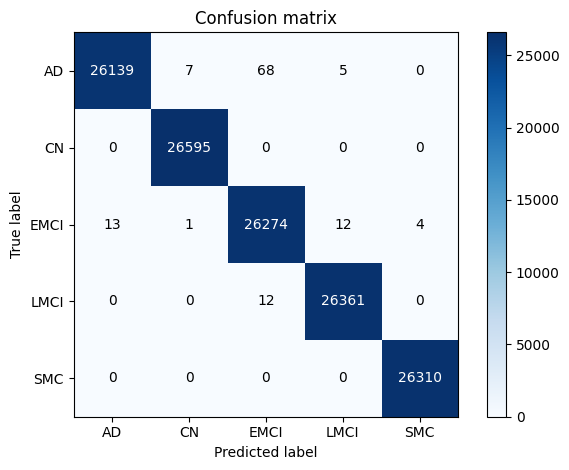

In [ ]:
# 导入需要的库
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
 

label_mapping = {0: 'ST', 1: 'WK', 2: 'TR', 3: 'BD', 4: 'SQ'}
X = pd.DataFrame(X_final).values  # 输入特征
y = pd.DataFrame(y_final).values  # 目标变量

# 将数据分为训练数据和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)
# 训练XGBoost分类器
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
#xgb.plot_tree(model)
# 使用测试数据预测类别
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# 输出混淆矩阵
for i, true_label in enumerate(label_mapping.values()):
    row = ''
    for j, pred_label in enumerate(label_mapping.values()):
        row += f'{cm[i, j]} ({pred_label})\t'
    print(f'{row} | {true_label}')
 
# 输出混淆矩阵
print(classification_report(y_test, y_pred,target_names=['AD', 'CN', 'EMCI', 'LMCI', 'SMC']))  # 输出混淆矩阵
print("Accuracy:")
print(accuracy_score(y_test, y_pred))
 
 
# label_names 是分类变量的取值名称列表
label_names = ['AD', 'CN', 'EMCI', 'LMCI', 'SMC']
cm = confusion_matrix(y_test, y_pred)
 
# 绘制混淆矩阵图
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=label_names, yticklabels=label_names,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')
 
# 在矩阵图中显示数字标签
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
 
fig.tight_layout()
#plt.show()
plt.savefig('XGBoost_Conclusion.png', dpi=300)
# 上面的代码首先计算混淆矩阵，然后使用 matplotlib 库中的 imshow 函数将混淆矩阵可视化，最后通过 text 函数在混淆矩阵上添加数字，并使用 show/savefig 函数显示图像。